In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [2]:
def svd(image, rank = None):
    if rank ==  None:
        rank = min(image.shape[0], image.shape[1])
    U, S, V = np.linalg.svd(image)
    compressed_image = np.dot(U[:,:rank], (np.expand_dims(S[:rank], 1)*V[:rank, :]))
    
    m, n = image.shape
    num_final = (m + n + 1)*rank
    num_init = m*n
    
    com_ratio  =num_final/num_init
    
    return compressed_image, com_ratio, rank 


def final(image, rank = None, plot = False):
    
    matplotlib.rcParams['figure.figsize'] = [8,10]
    
    compressed_image, com_ratio, rank = svd(image, rank)
    
    if plot:
        title = "Rank: %d, Compression Ratio: %.2f%%" %(rank, 100.0 if com_ratio > 1.0 else com_ratio*100)
        plt.title(title)
        plt.subplot(121)
        plt.title("Original Image")
        plt.imshow(img, cmap = 'gray')
        plt.subplot(122)
        plt.title(title)
        plt.imshow(compressed_image, cmap = 'gray')
        plt.show()


    


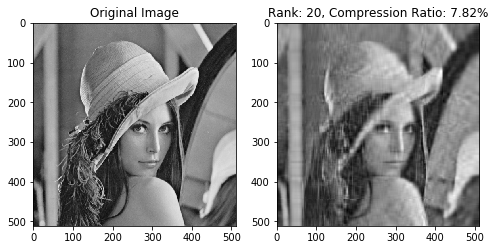

In [3]:
if __name__ == '__main__':

    img = cv2.imread("image1.jpg", 0)
    final(img, 20, True)